In [10]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, ExpSineSquared, ConstantKernel
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from datetime import datetime

In [11]:
attribute_names = pd.read_csv('attributes.txt', delim_whitespace = True, header=None, skipinitialspace=True)
df_crime = pd.read_csv('communities.data',sep=',',names=attribute_names[0], header=None, skipinitialspace=True)

In [12]:
df_crime.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [13]:
print(df_crime.info())
df_crime.replace(r'^\s*$', np.nan, regex=True, inplace = True)
df_crime.replace('?', np.nan, inplace = True)
print(df_crime.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB
None
state                      0
county                  1174
community               1177
communityname              0
fold                       0
population                 0
householdsize              0
racepctblack               0
racePctWhite               0
racePctAsian               0
racePctHisp                0
agePct12t21                0
agePct12t29                0
agePct16t24                0
agePct65up                 0
numbUrban                  0
pctUrban                   0
medIncome                  0
pctWWage                   0
pctWFarmSelf               0
pctWInvInc                 0
pctWSocSec                 0
pctWPubAsst                0
pctWRetire                 0
medFamInc                  0
perCapInc                  0
whitePerCap                0
blackPerCap           

In [14]:
#As shown above dataset has lot of features with high number of missing values and needs some preprocessing.

In [15]:
#Based on the Attribute Information given in supporting file communities.names we first remove the Non-Predictive features.
non_predictive_features = ['state','county','community','communityname','fold']
df_crime = df_crime.drop(columns=non_predictive_features, axis=1)
df_crime.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [16]:
#Analysing the misssing values
cols_with_missing_vals = df_crime.columns[df_crime.isnull().any()]
print('Total Number of records:'+str(df_crime.shape[0]))
print('Number of cols with missing values:'+str(cols_with_missing_vals.shape[0]))

Total Number of records:1994
Number of cols with missing values:23


In [17]:
df_crime[cols_with_missing_vals].describe()

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,...,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,1993,319,319,319,319,319,319,319,319,319,...,319,319,319,319,319,319,319,319,319,319
unique,97,38,52,34,55,44,59,75,52,76,...,50,72,30,15,77,63,38,72,3,51
top,0,0.02,0.1,0.98,0.14,0.02,0.14,0.23,0.1,0.78,...,0,0.07,0.03,0.57,0.19,0.02,0.02,0.79,0,0.12
freq,129,80,19,81,17,55,23,15,19,12,...,189,14,48,54,12,27,69,13,126,22


In [18]:
# Each of the 22 out of the 23 cols have approx 84% values missings i.e. (1675/1994). So it makes sense to drop these columns.
# Col 'OtherPerCap' has only one missing value. So we replace it with the mean.

In [19]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df_crime[['OtherPerCap']])
df_crime[['OtherPerCap']] = imp.transform(df_crime[['OtherPerCap']])
df_crime = df_crime.dropna(axis=1)
df_crime.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [20]:
#Preparing the training and testing dataset.
X_train, X_test, y_train, y_test = train_test_split(df_crime.iloc[:, 0:100].values, df_crime.iloc[:, 100].values, test_size=0.33, random_state=0)
#Standardising the data set
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
#Goal attribute to be predicted - ViolentCrimesPerPop: Total number of violent crimes per 100K popuation (numeric - decimal)

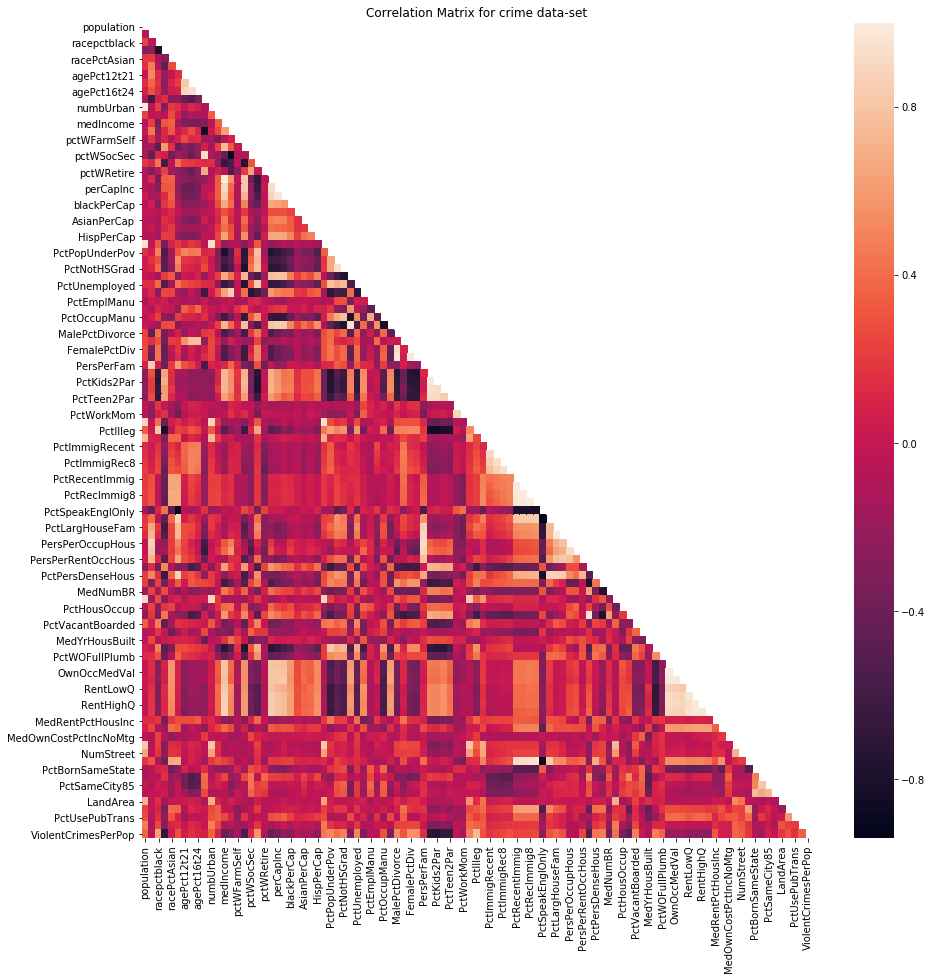

In [22]:
crime_corr = df_crime.corr()
fig = plt.figure(figsize = (15,15))
mask = np.zeros_like(crime_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(crime_corr,mask=mask)
plt.title('Correlation Matrix for crime data-set')
plt.show()

In [23]:
#With the number of features too high and a high degree of co-relation between some of the features 
#it makes sense to reduce this MultiCollinearity by doing dimensionality reduction (applying PCA).

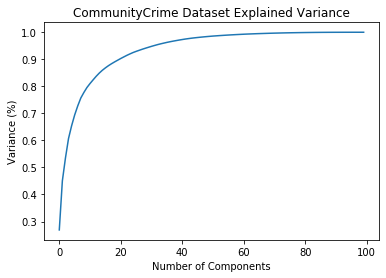

In [24]:
pca = PCA()
X_train = pca.fit_transform(X_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('CommunityCrime Dataset Explained Variance')
plt.show()

In [25]:
#So anywhere close 40 features we retain more than 90% of the variance in our data set. 
#Setting number of Principal Componenets = 40 (Features = 40)

In [26]:
num_pc = 40
pca = PCA(n_components = num_pc)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print('Dataset variance percentage retained: '+str(np.sum(pca.explained_variance_ratio_) * 100))

Dataset variance percentage retained: 97.11443012771703


In [27]:
#Running the dataset across various regressors

In [28]:
def svr_param_selection(X, y, X_test, y_test, nfolds):
    Kernels = ['linear', 'poly', 'rbf']
    Cs = [0.001, 0.01, 0.1, 1]
    Gammas = [0.001, 0.01, 0.1]
    param_grid = {'kernel':Kernels, 'C': Cs, 'gamma' : Gammas}
    grid_search = GridSearchCV(SVR(), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('SVR MSE Score for training data: '+str(grid_search.best_score_))
    print('SVR With Parameters: '+str(grid_search.best_params_))    
    print('SVR coefficient of determination R^2 on test data: '+str(grid_search.best_estimator_.score(X_test, y_test)))
    y_pred = grid_search.best_estimator_.predict(X_test)
    print('MSE for SVR on test set: '+str(mean_squared_error(y_test, y_pred)))

In [29]:
def random_forest_regressor_param_selection(X, y, X_test, y_test, nfolds):
    Estimators = np.arange(1,100,15)
    Max_features = ['auto', 'sqrt']
    Min_samples_leafs = np.linspace(0.01, 0.05, 5, endpoint=True)
    param_grid = {'n_estimators': Estimators, 'max_features': Max_features, 'min_samples_leaf': Min_samples_leafs}
    grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('RandomForestRegressor MSE Score for training data: '+str(grid_search.best_score_))
    print('RandomForestRegressor With Parameters: '+str(grid_search.best_params_))    
    print('Random Forest coefficient of determination R^2 on test data: '+str(grid_search.best_estimator_.score(X_test, y_test)))
    y_pred = grid_search.best_estimator_.predict(X_test)
    print('MSE for Random Forest Regressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [30]:
def decision_tree_regressor_param_selection(X, y, X_test, y_test, nfolds):
    Max_features = ['auto', 'sqrt']
    Min_samples_leafs = np.linspace(0.01, 0.05, 5, endpoint=True)
    param_grid = {'max_features': Max_features, 'min_samples_leaf': Min_samples_leafs}
    grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('DecisionTreeRegressor MSE Score for training data: '+str(grid_search.best_score_))
    print('DecisionTreeRegressor With Parameters: '+str(grid_search.best_params_)) 
    print('Decision Tree coefficient of determination R^2 on test data: '+str(grid_search.best_estimator_.score(X_test, y_test)))
    y_pred = grid_search.best_estimator_.predict(X_test)
    print('MSE for Decision Tree Regressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [36]:
def ada_boost_regressor_param_selection(X, y, X_test, y_test, nfolds):
    Estimators = np.arange(1,100,15)
    Learning_rates = [0.01,0.05,0.1,0.3]
    Losses = ['linear', 'square', 'exponential']
    param_grid = {'n_estimators': Estimators, 'learning_rate': Learning_rates, 'loss': Losses}
    grid_search = GridSearchCV(AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=0),random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('AdaBoostRegressor MSE Score for training data: '+str(grid_search.best_score_))
    print('AdaBoostRegressor With Parameters:'+str(grid_search.best_params_))
    print('AdaBoost Regressor coefficient of determination R^2 on test data: '+str(grid_search.best_estimator_.score(X_test, y_test)))
    y_pred = grid_search.best_estimator_.predict(X_test)
    print('MSE for AdaBoost Regressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [37]:
def gaussian_regressor_param_selection(X, y, X_test, y_test, nfolds):
    kernel_rbf = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")
    kernel_rq = ConstantKernel(1.0, constant_value_bounds="fixed") * RationalQuadratic(alpha=0.1, length_scale=1)
    kernel_expsine = ConstantKernel(1.0, constant_value_bounds="fixed") * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))
    Kernels = [kernel_rbf, kernel_rq, kernel_expsine]
    param_grid = {'kernel': Kernels}
    grid_search = GridSearchCV(GaussianProcessRegressor(random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('GaussianRegressor MSE Score for training data: '+str(grid_search.best_score_))
    print('GaussianRegressor With Parameters:'+str(grid_search.best_params_)) 
    print('Gaussian Regressor coefficient of determination R^2 on test data: '+str(grid_search.best_estimator_.score(X_test, y_test)))
    y_pred = grid_search.best_estimator_.predict(X_test)
    print('MSE for Gaussian Regressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [38]:
def linear_regressor_param_selection(X, y, X_test, y_test, nfolds):
    param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
    grid_search = GridSearchCV(LinearRegression(), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('LinearRegressor MSE Score for training data: '+str(grid_search.best_score_))
    print('LinearRegressor With Parameters:'+str(grid_search.best_params_))  
    print('Linear Regressor coefficient of determination R^2 on test data: '+str(grid_search.best_estimator_.score(X_test, y_test)))
    y_pred = grid_search.best_estimator_.predict(X_test)
    print('MSE for LinearRegressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [39]:
def neural_network_regressor_param_selection(X, y, X_test, y_test, nfolds):
    Hidden_Layer_Sizes = [1, 5, (5,5), (10,5)]
    Activations = ['logistic', 'relu']
    param_grid = {'hidden_layer_sizes': Hidden_Layer_Sizes, 'activation': Activations}
    grid_search = GridSearchCV(MLPRegressor(max_iter=900,random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('NeuralNetworkRegressor MSE Score for training data: '+str(grid_search.best_score_))
    print('NeuralNetworkRegressor With Parameters:'+str(grid_search.best_params_))
    print('Neural Network Regressor coefficient of determination R^2 on test data: '+str(grid_search.best_estimator_.score(X_test, y_test)))
    y_pred = grid_search.best_estimator_.predict(X_test)
    print('MSE for NeuralNetwork Regressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [40]:
#Using the 3-Fold HyperParam Search to evaluate the best hyperparams for each model
print("now ="+str(datetime.now()))
svr_best_param           = svr_param_selection(X_train_pca, y_train, X_test_pca, y_test, 3)
print("now ="+str(datetime.now()))
random_forest_best_param = random_forest_regressor_param_selection(X_train_pca, y_train, X_test_pca, y_test, 3)
print("now ="+str(datetime.now()))
decision_tree_best_param = decision_tree_regressor_param_selection(X_train_pca, y_train, X_test_pca, y_test, 3)
print("now ="+str(datetime.now()))
ada_boost_best_param     = ada_boost_regressor_param_selection(X_train_pca, y_train, X_test_pca, y_test, 3)
print("now ="+str(datetime.now()))
linear_best_param         = linear_regressor_param_selection(X_train_pca, y_train, X_test_pca, y_test, 3)
print("now ="+str(datetime.now()))
neural_network_best_param = neural_network_regressor_param_selection(X_train_pca, y_train, X_test_pca, y_test, 3)
print("now ="+str(datetime.now()))
#gaussian_best_param       = gaussian_regressor_param_selection(x_train_scaled, y_train, 3)
#print("now ="+str(datetime.now()))

now =2019-11-13 19:55:50.156696
SVR MSE Score for training data: 0.6469050245394855
SVR With Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVR coefficient of determination R^2 on test data: -0.10075193124593418
MSE for SVR on test set: 0.058412605027307114
now =2019-11-13 19:55:52.979606
RandomForestRegressor MSE Score for training data: 0.6041925199042318
RandomForestRegressor With Parameters: {'max_features': 'auto', 'min_samples_leaf': 0.01, 'n_estimators': 91}
Random Forest coefficient of determination R^2 on test data: 0.11406405789869745
MSE for Random Forest Regressor on test set: 0.04701315963796066
now =2019-11-13 19:56:26.123450
DecisionTreeRegressor MSE Score for training data: 0.4721830039935942
DecisionTreeRegressor With Parameters: {'max_features': 'auto', 'min_samples_leaf': 0.03}
Decision Tree coefficient of determination R^2 on test data: 0.12256300326436653
MSE for Decision Tree Regressor on test set: 0.046562153807581094
now =2019-11-13 19:56:26.654594
AdaBoos